In [1]:
import sys
from pathlib import Path
prediction_mode_path = Path("../module")
sys.path.append(prediction_mode_path.as_posix())
import models_creation as pred_model

import pandas as pd
import numpy as np

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from matplotlib import pyplot as plt

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
load_prepared_data = pd.read_excel('../Data/Kolchicyna_machine_learning.xlsx')
load_prepared_data = load_prepared_data.drop(columns=['Unnamed: 0'])

target = 'LoVo/DX'

corr_low = 0.33
corr_high = 0.64

random_state = 15

In [3]:
load_prepared_data.head()

,AATS0Z,AATS0are,AATS0d,AATS0dv,AATS0i,AATS0m,AATS0p,AATS0pe,AATS0s,AATS0se,...,A549_float,MCF-7_float,LoVo_float,LoVo/DX_float,BALB/3T3_float,A549_float_transformed,MCF-7_float_transformed,LoVo_float_transformed,LoVo/DX_float_transformed,BALB/3T3_float_transformed
0,25.090909,6.046518,3.109091,6.662626,160.775045,99.075564,1.555512,6.126680,3.435416,7.629859,...,10.8,10.3,6.5,54.9,10.2,7.966576,7.987163,8.187087,7.260428,7.991400
1,24.448276,6.008422,3.051724,6.386973,161.021674,96.473315,1.538471,6.088791,3.330998,7.596891,...,11.6,12.0,8.5,31.1,14.3,7.935542,7.920819,8.070581,7.507240,7.844664
2,23.868852,5.974074,3.000000,6.138434,161.244045,94.127025,1.523105,6.054630,3.236850,7.567166,...,10.9,12.2,8.8,17.9,11.7,7.962574,7.913640,8.055517,7.747147,7.931814
3,23.868852,5.974074,3.032787,6.171220,161.244045,94.127025,1.523105,6.054630,3.257798,7.567166,...,10.5,11.3,8.5,10.2,11.0,7.978811,7.946922,8.070581,7.991400,7.958607
4,23.343750,5.942945,2.953125,5.913194,161.445569,92.000700,1.509180,6.023670,3.151529,7.540228,...,89.5,92.7,52.8,77.8,99.4,7.048177,7.032920,7.277366,7.109020,7.002614


In [4]:
data = load_prepared_data[list(load_prepared_data.columns)[0:-10]]
data[target] = load_prepared_data[load_prepared_data.columns[-2]]
data.head()

,AATS0Z,AATS0are,AATS0d,AATS0dv,AATS0i,AATS0m,AATS0p,AATS0pe,AATS0s,AATS0se,...,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9,LoVo/DX
0,25.090909,6.046518,3.109091,6.662626,160.775045,99.075564,1.555512,6.126680,3.435416,7.629859,...,7.999655,4.266195,4.915408,5.516700,6.098566,6.595759,6.979116,7.337313,7.681445,7.260428
1,24.448276,6.008422,3.051724,6.386973,161.021674,96.473315,1.538471,6.088791,3.330998,7.596891,...,8.018726,4.280132,4.922714,5.520711,6.103048,6.601209,6.985613,7.349442,7.695531,7.507240
2,23.868852,5.974074,3.000000,6.138434,161.244045,94.127025,1.523105,6.054630,3.236850,7.567166,...,8.028799,4.293878,4.929967,5.524706,6.105281,6.603923,6.989306,7.353932,7.704023,7.747147
3,23.868852,5.974074,3.032787,6.171220,161.244045,94.127025,1.523105,6.054630,3.257798,7.567166,...,8.037440,4.307438,4.929967,5.524706,6.107510,6.606629,6.992068,7.361425,7.709420,7.991400
4,23.343750,5.942945,2.953125,5.913194,161.445569,92.000700,1.509180,6.023670,3.151529,7.540228,...,8.034892,4.307438,4.937168,5.528685,6.107510,6.605277,6.991148,7.356489,7.707175,7.109020


In [5]:
print(data.shape)
data = data.dropna()
data.shape

(120, 1212)


(106, 1212)

# Multiple Linear regression (MLR)

In [6]:
without_standardization, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.5, 
                                                                                                    standardization=False, 
                                                                                                    model_type='linear_model',
                                                                                                    target_column_name = str(target),
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.018677
1                  AATS0are   -0.341313
2                    AATS0d   -0.123443
3                   AATS0dv   -0.265670
4                    AATS0i   -0.428929
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.018677                    0.018677
1                  AATS0are   -0.341313                    0.341313
2                    AATS0d   -0.123443                    0.123443
3                   AATS0dv   -0.265670                    0.265670
4                    AATS0i   -0.428929                    0.428929
    molecular descriptor name  corr_value  absolute correlation value
15                     AATS1i   -0.561620                    0.561620
113       

LoVo/DX_transformed
AxesSubplot(0.125,0.11;0.775x0.77)


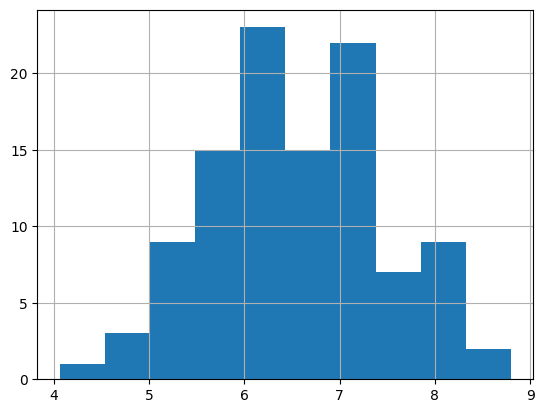

In [7]:
print(target_column_name+str('_transformed'))
print(hist1[target_column_name].hist())

In [8]:
with_standardization, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.50, 
                                                                                                    standardization=True, 
                                                                                                    model_type='linear_model',
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)

I am doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.018677
1                  AATS0are   -0.341313
2                    AATS0d   -0.123443
3                   AATS0dv   -0.265670
4                    AATS0i   -0.428929
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.018677                    0.018677
1                  AATS0are   -0.341313                    0.341313
2                    AATS0d   -0.123443                    0.123443
3                   AATS0dv   -0.265670                    0.265670
4                    AATS0i   -0.428929                    0.428929
    molecular descriptor name  corr_value  absolute correlation value
15                     AATS1i   -0.561620                    0.561620
113           

## Search inside correlation space

In [9]:
step = 0.01
initial_step = corr_low
last_step = corr_high
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
fourth_l = []
fifth_l = []
f_list = []
for i in first_list:
    without_standardization, train_r2, test_r2, _, h_, target_column_name, training_data_RMSE, test_data_RMSE = pred_model.prepare_data_and_create_model(molecular_descriptors_df = data, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standardization = False, 
                                                                                                    model_type = 'linear_model',
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_ = True, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    fourth_l.append(training_data_RMSE)
    fifth_l.append(test_data_RMSE)
    f_list.append(len(h_))


In [10]:
df_without_standardization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_without_standardization['Training data R^2 score'] = second_list
df_without_standardization['Test data R^2 score'] = third_list
df_without_standardization['Training RMSE'] = fourth_l
df_without_standardization['Test RMSE'] = fifth_l
df_without_standardization['Number of features'] = f_list

In [11]:
df_linear = df_without_standardization.copy()
df_without_standardization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Training RMSE,Test RMSE,Number of features
0,0.33,1.000000,-13.371015,8.219094e-13,2.386128,527
1,0.34,1.000000,-13.804982,1.369763e-13,2.421888,512
2,0.35,1.000000,-17.508581,3.272271e-13,2.707925,487
3,0.36,1.000000,-18.173919,3.216461e-13,2.756167,455
4,0.37,1.000000,-22.385675,5.639714e-13,3.043863,435
5,0.38,1.000000,-19.327214,4.267848e-13,2.837847,399
6,0.39,1.000000,-20.111861,8.725490e-13,2.892100,377
7,0.40,1.000000,-12.284709,2.246411e-12,2.294173,343
8,0.41,1.000000,-10.243588,6.586269e-12,2.110584,290
9,0.42,1.000000,-9.687742,1.298848e-12,2.057752,245


## Plots

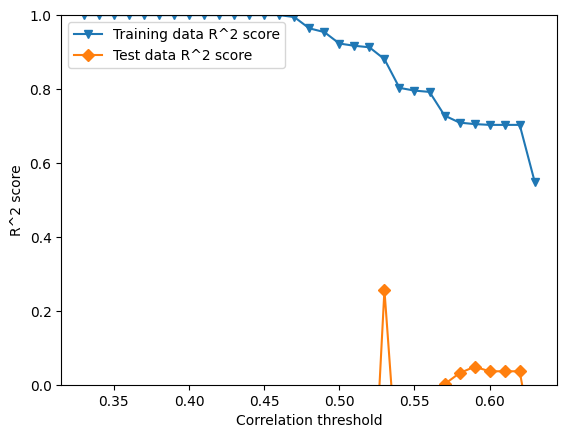

In [12]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Training data R^2 score'], label = "Training data R^2 score", marker='v')
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Test data R^2 score'], label = "Test data R^2 score", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R^2 score')
plt.ylim([0, 1])
plt.show()

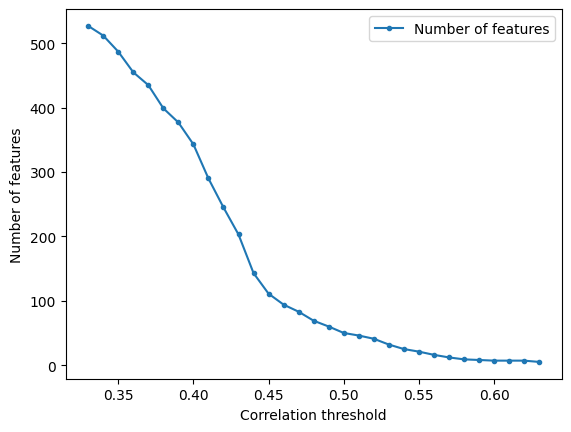

In [13]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

## Decision Tree

In [14]:
without_standardization, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.50, 
                                                                                                    standardization=False, 
                                                                                                    model_type='DecisionTreeRegressor',
                                                                                                    max_depth=5,
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.018677
1                  AATS0are   -0.341313
2                    AATS0d   -0.123443
3                   AATS0dv   -0.265670
4                    AATS0i   -0.428929
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.018677                    0.018677
1                  AATS0are   -0.341313                    0.341313
2                    AATS0d   -0.123443                    0.123443
3                   AATS0dv   -0.265670                    0.265670
4                    AATS0i   -0.428929                    0.428929
    molecular descriptor name  corr_value  absolute correlation value
15                     AATS1i   -0.561620                    0.561620
113       

LoVo/DX_transformed
AxesSubplot(0.125,0.11;0.775x0.77)


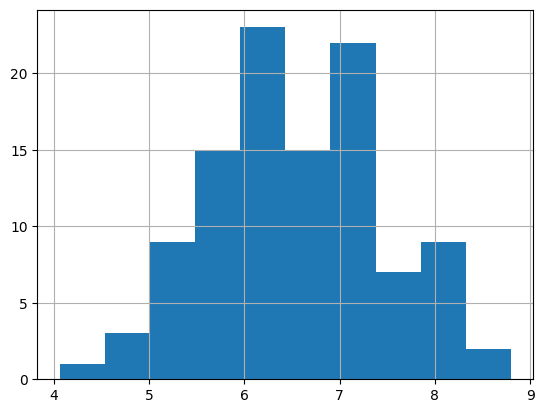

In [15]:
print(target_column_name+str('_transformed'))
print(hist1[target_column_name].hist())

In [16]:
with_standardization, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.50, 
                                                                                                    standardization=True, 
                                                                                                    model_type='DecisionTreeRegressor',
                                                                                                    max_depth=5,
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)

I am doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.018677
1                  AATS0are   -0.341313
2                    AATS0d   -0.123443
3                   AATS0dv   -0.265670
4                    AATS0i   -0.428929
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.018677                    0.018677
1                  AATS0are   -0.341313                    0.341313
2                    AATS0d   -0.123443                    0.123443
3                   AATS0dv   -0.265670                    0.265670
4                    AATS0i   -0.428929                    0.428929
    molecular descriptor name  corr_value  absolute correlation value
15                     AATS1i   -0.561620                    0.561620
113           

## Search inside correlation space

In [17]:
step = 0.01
initial_step = corr_low
last_step = corr_high
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
max_depth = [range(2, 30, 1)]
corr_th = []
second_list = []
third_list = []
fourth_l = []
fifth_l = []
f_list = []
fif_list = []
for i in first_list:
    for depth in max_depth[0]:
        
        without_standardization, train_r2, test_r2, _, h_, target_column_name, training_data_RMSE, test_data_RMSE = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=i, 
                                                                                                    standardization=False, 
                                                                                                    model_type='DecisionTreeRegressor',
                                                                                                    max_depth=depth,
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=False)
        corr_th.append(i)
        second_list.append(train_r2)
        third_list.append(test_r2)
        fourth_l.append(training_data_RMSE)
        fifth_l.append(test_data_RMSE)
        f_list.append(len(h_))
        fif_list.append(depth)


In [18]:
df_without_standardization = pd.DataFrame(data=corr_th, columns=["Correlation threshold"])
df_without_standardization['Training data R^2 score'] = second_list
df_without_standardization['Test data R^2 score'] = third_list
df_without_standardization['Training RMSE'] = fourth_l
df_without_standardization['Test RMSE'] = fifth_l
df_without_standardization['Number of features'] = f_list
df_without_standardization['Depth number'] = fif_list

In [19]:
df_decision_tree = df_without_standardization.copy()
#df_without_standardization.to_excel('../Data/A549_Decision_tree_rs_'+str(random_state)+'.xlsx')

## Plots

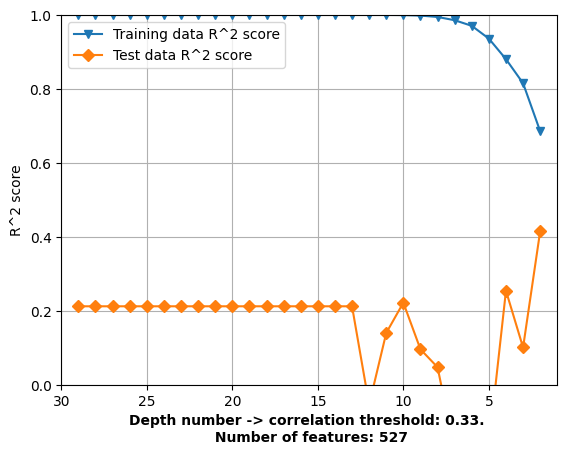

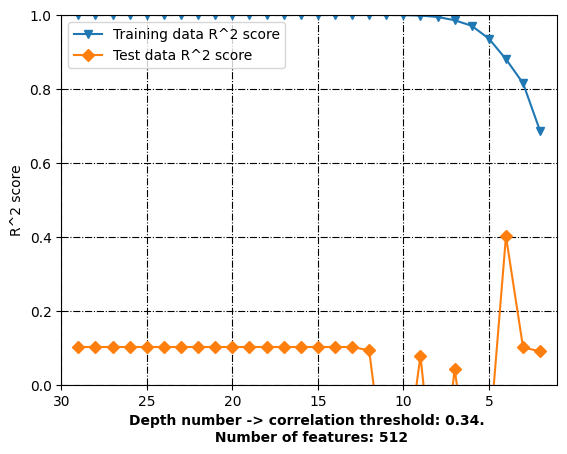

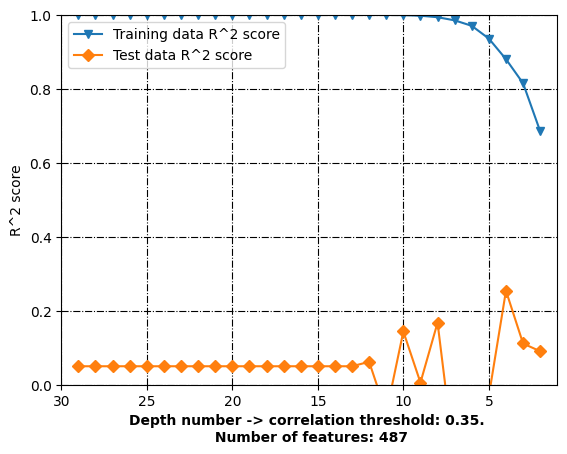

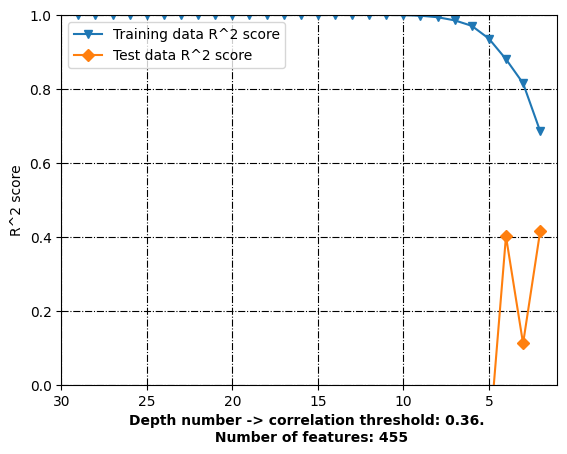

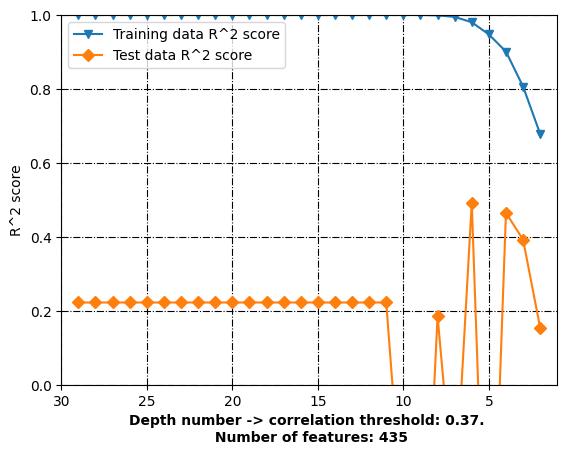

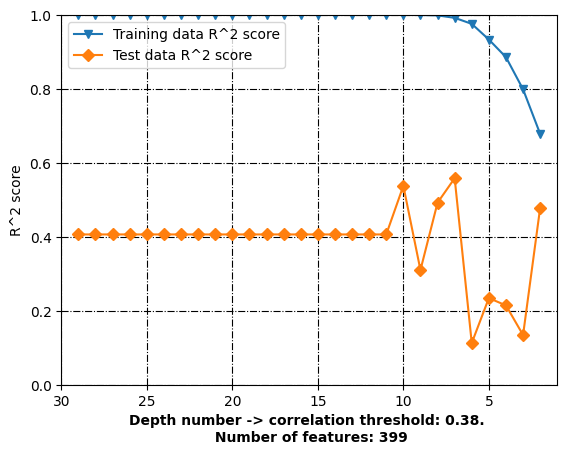

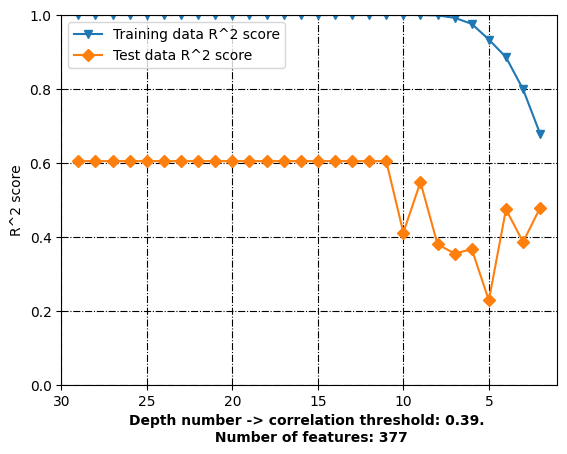

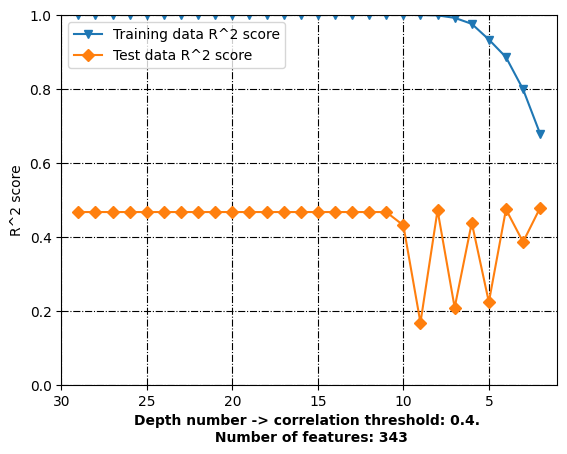

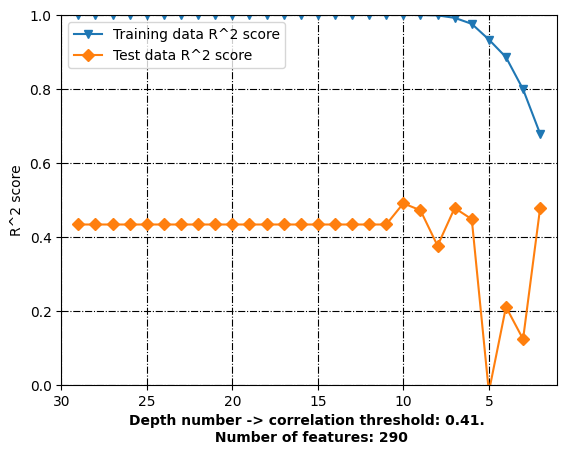

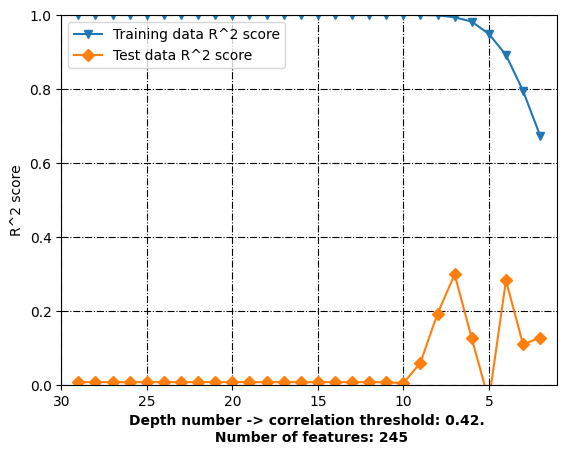

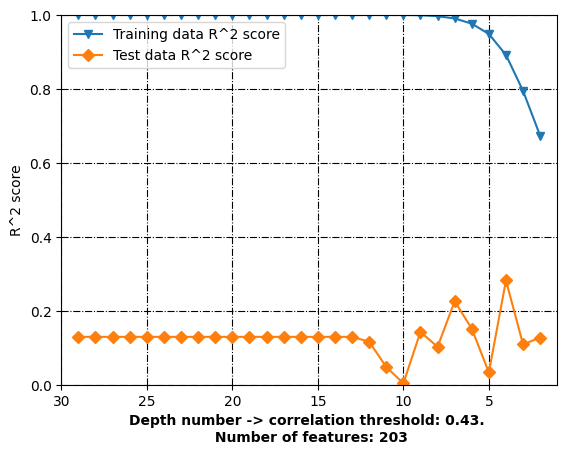

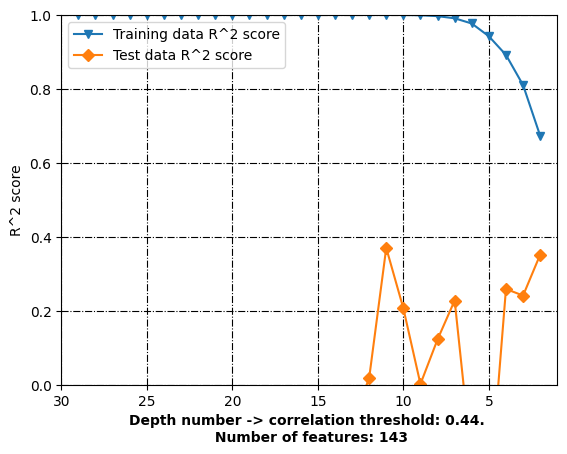

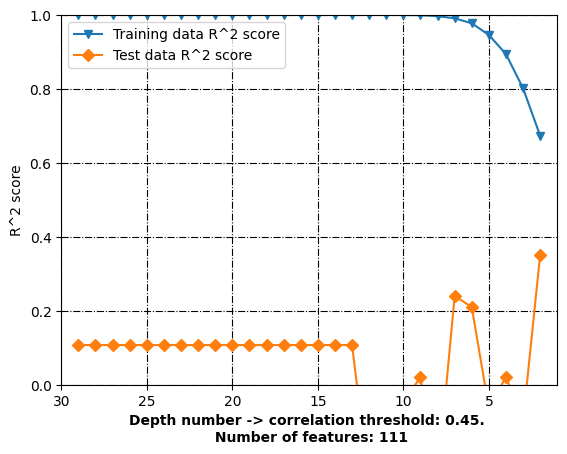

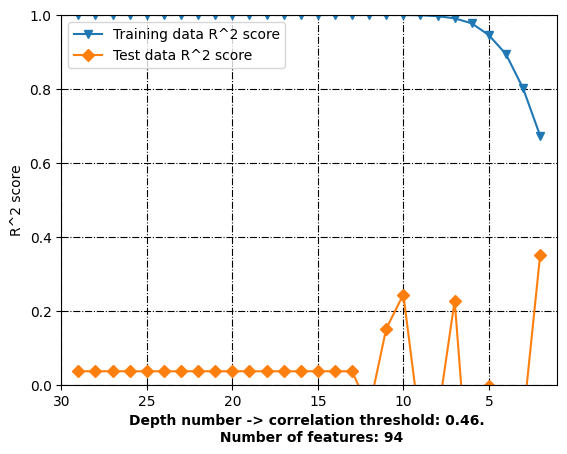

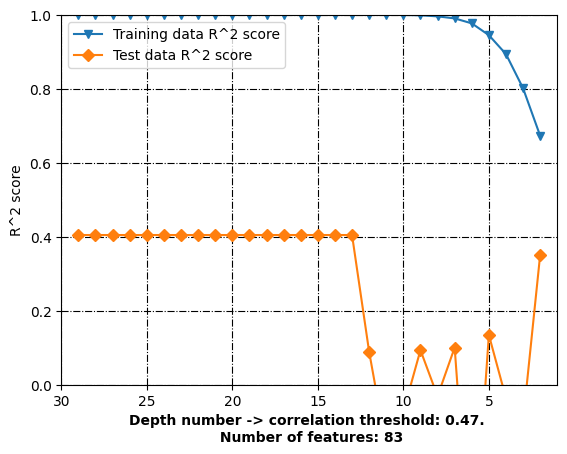

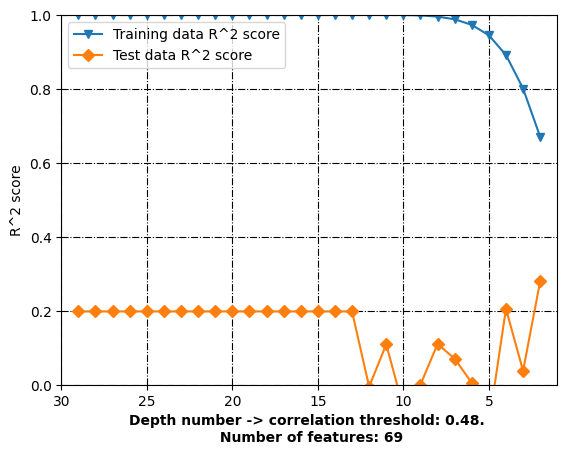

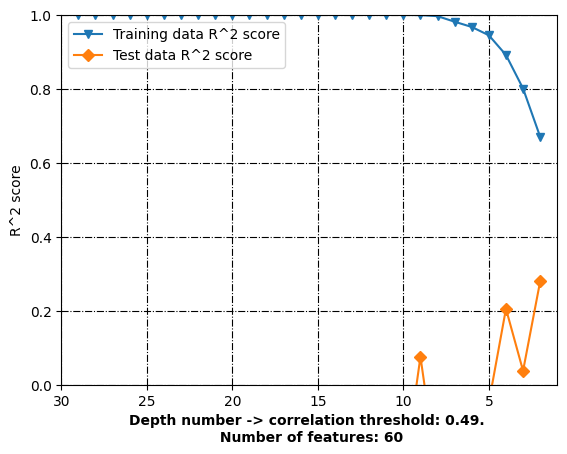

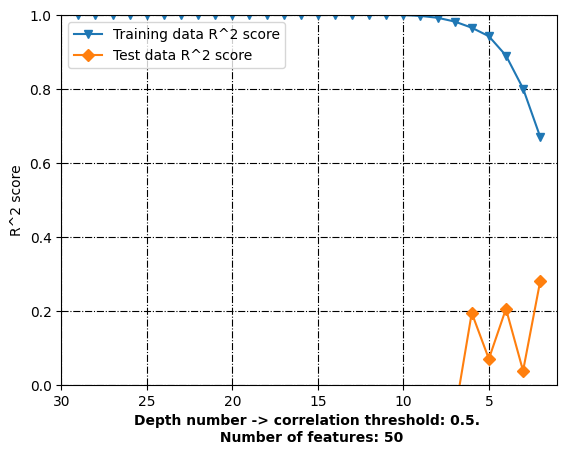

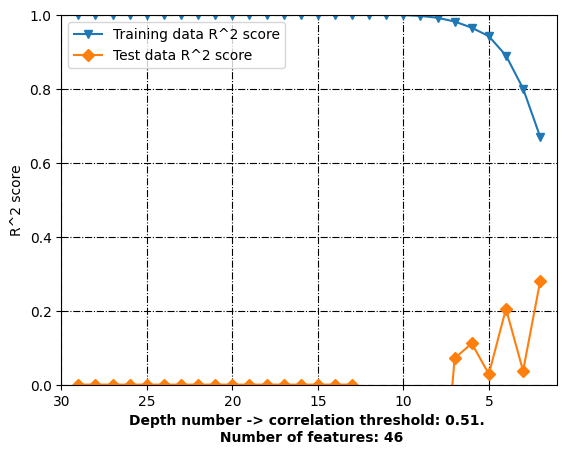

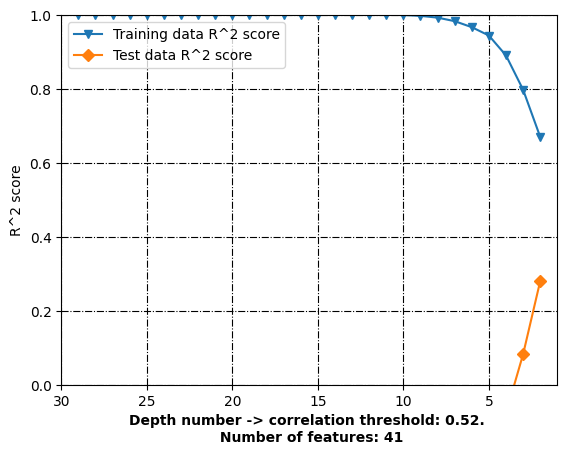

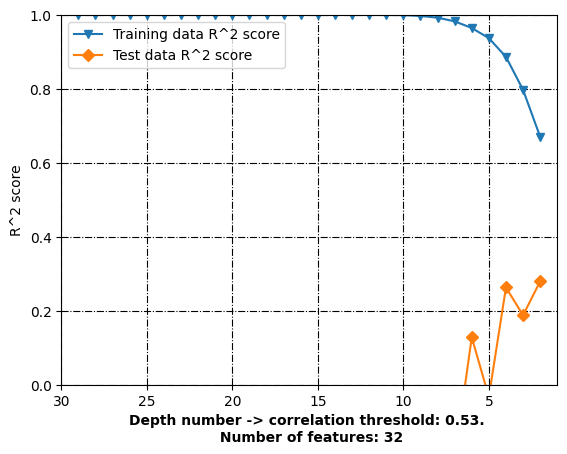

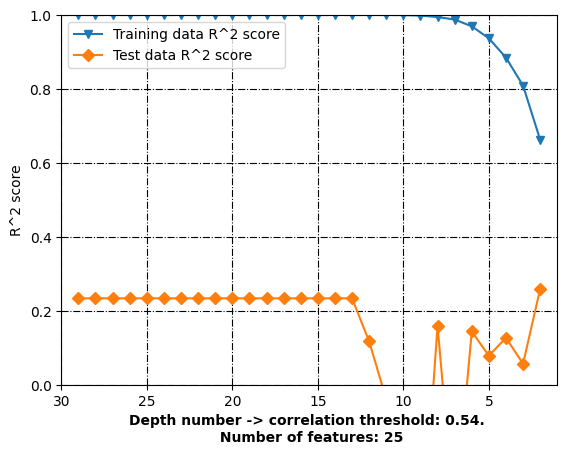

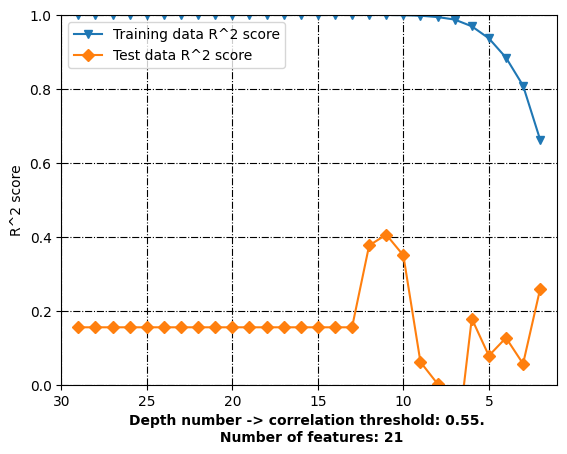

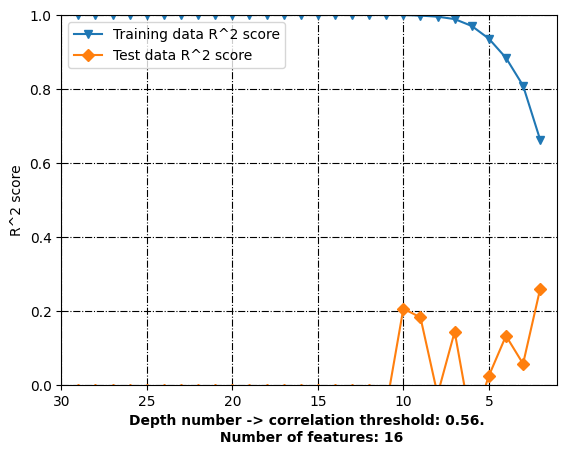

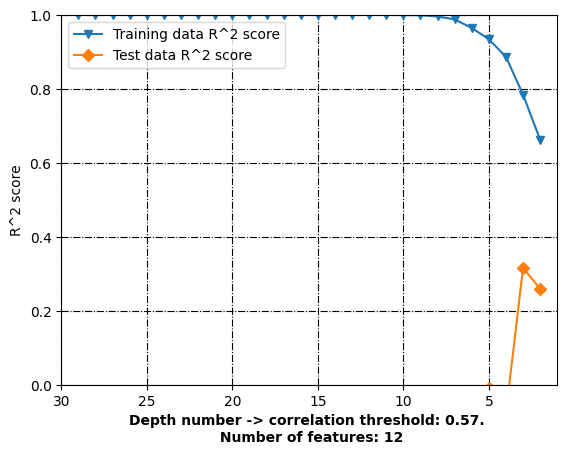

In [ ]:
corre_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(0.01*100))]
for element in corre_list:
    element_ = df_without_standardization[df_without_standardization['Correlation threshold'] == float(element)]
    plt.plot(element_['Depth number'], element_['Training data R^2 score'], label = "Training data R^2 score", marker='v')
    plt.plot(element_['Depth number'], element_['Test data R^2 score'], label = "Test data R^2 score", marker='D')
    plt.legend()
    plt.xlabel('Depth number -> correlation threshold: '+str(element)+'. \n Number of features: '+str(element_['Number of features'].iloc[0]), fontweight='bold')
    plt.xlim(max(element_['Depth number'])+1, min(element_['Depth number'])-1)
    plt.ylabel('R^2 score')
    plt.ylim([0, 1])
    plt.rc('grid', linestyle="-.", color='black')
    plt.grid(True)
    plt.show()

In [ ]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

# Random Forest

In [ ]:
without_standardization, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.50, 
                                                                                                    standardization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=12,
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)

In [ ]:
print(target_column_name+str('_transformed'))
print(hist1[target_column_name].hist())

In [ ]:
with_standardization, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.50, 
                                                                                                    standardization=True, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=12,
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)

## Search inside correlation space

In [25]:
step = 0.01
initial_step = corr_low
last_step = corr_high
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
n_estimators = [range(2,21,1)]
corr_th = []
second_list = []
third_list = []
fourth_l = []
fifth_l = []
f_list = []
fif_list = []
for i in first_list:
    
    for estimator in n_estimators[0]:
        
        without_standardization, train_r2, test_r2, _, h_, target_column_name, training_data_RMSE, test_data_RMSE = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=i, 
                                                                                                    standardization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=estimator,
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=False)
        corr_th.append(i)
        second_list.append(train_r2)
        third_list.append(test_r2)
        fourth_l.append(training_data_RMSE)
        fifth_l.append(test_data_RMSE)
        f_list.append(len(h_))
        fif_list.append(estimator)


In [26]:
df_without_standardization = pd.DataFrame(data=corr_th, columns=["Correlation threshold"])
df_without_standardization['Training data R^2 score'] = second_list
df_without_standardization['Test data R^2 score'] = third_list
df_without_standardization['Training RMSE'] = fourth_l
df_without_standardization['Test RMSE'] = fifth_l
df_without_standardization['Number of features'] = f_list
df_without_standardization['Number of estimators'] = fif_list

In [27]:
df_random_forest = df_without_standardization.copy()
#df_without_standardization.to_excel('../Data/A549_Random_forest_rs_'+str(random_state)+'.xlsx')

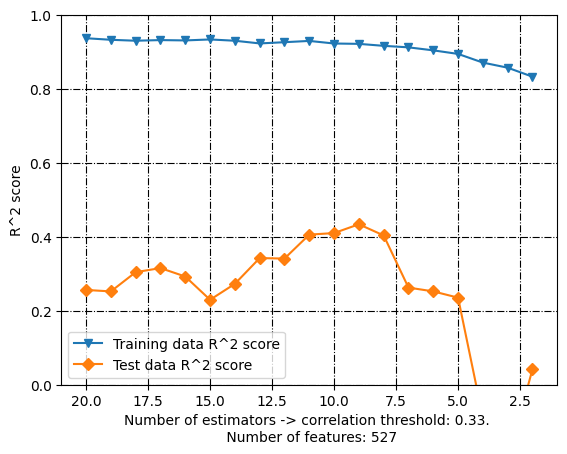

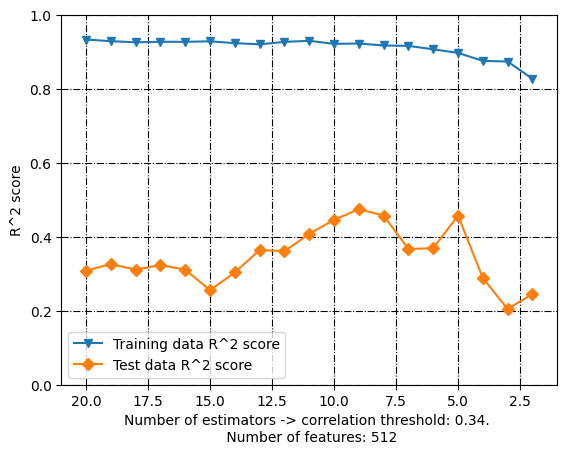

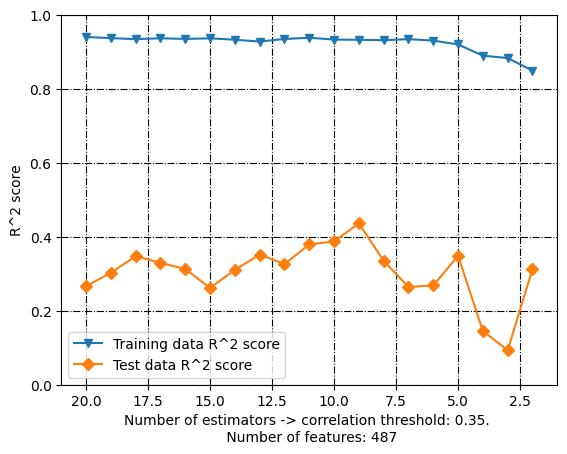

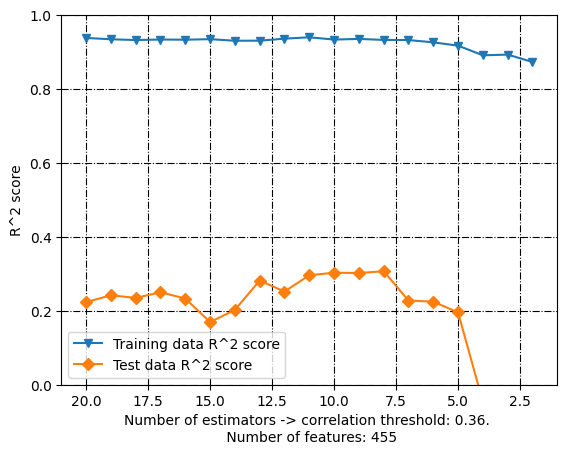

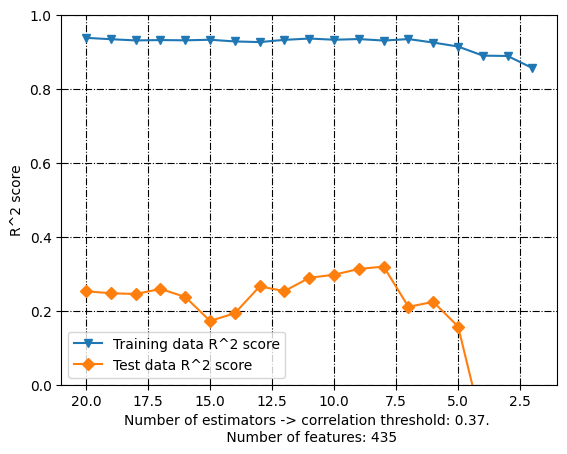

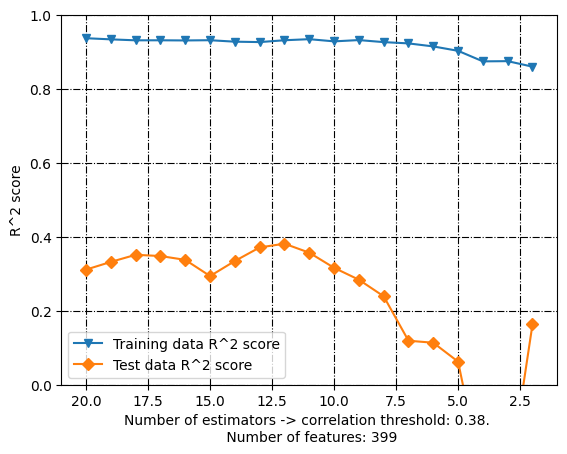

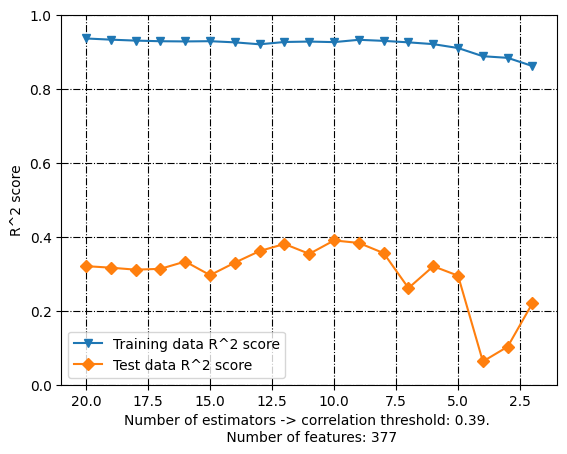

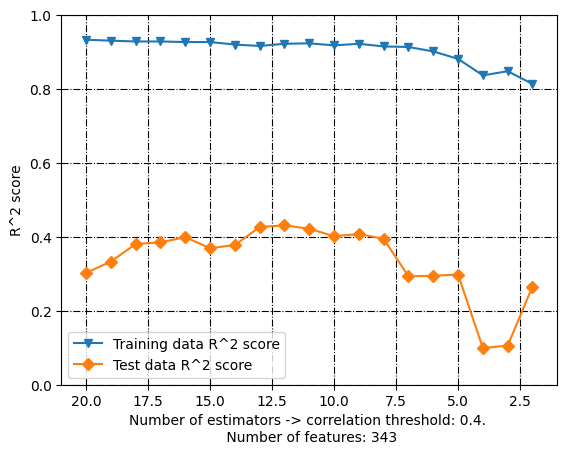

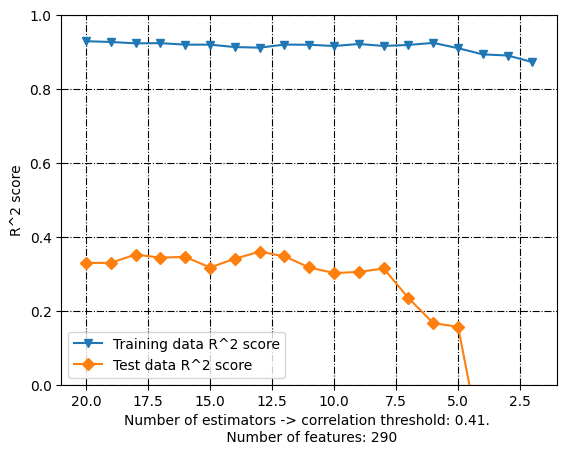

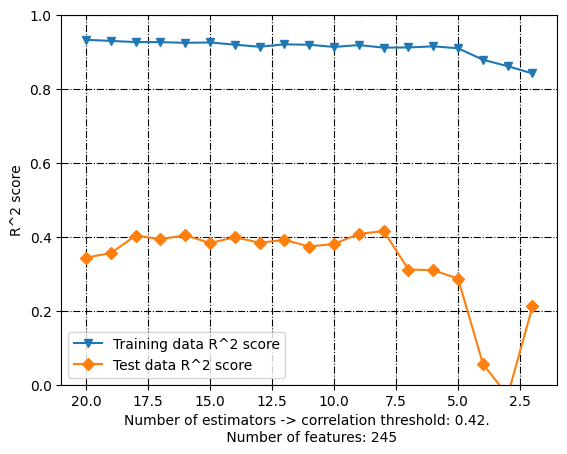

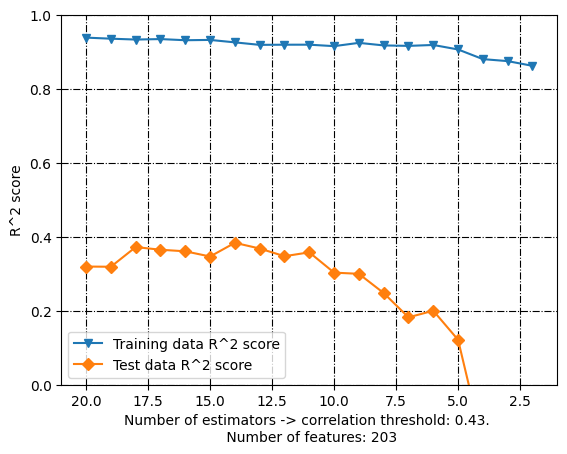

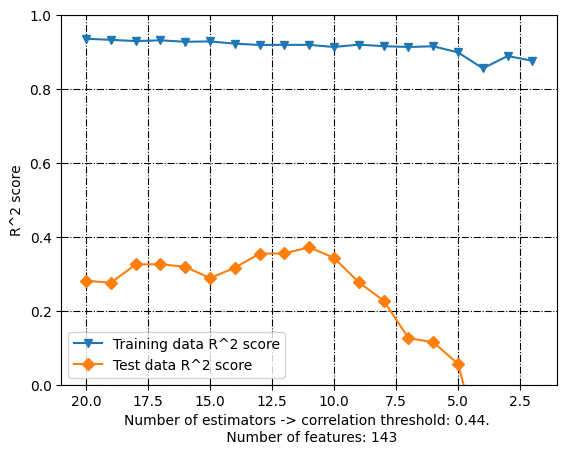

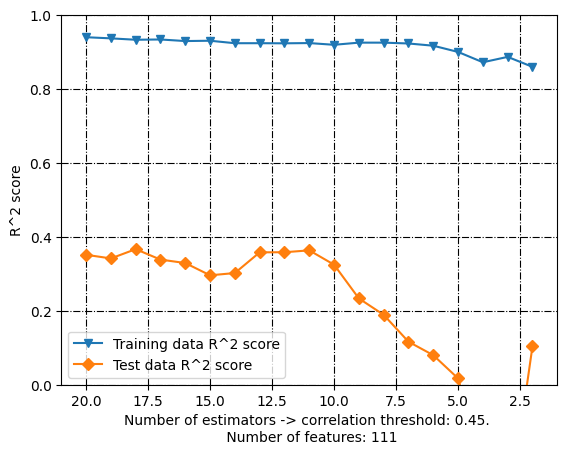

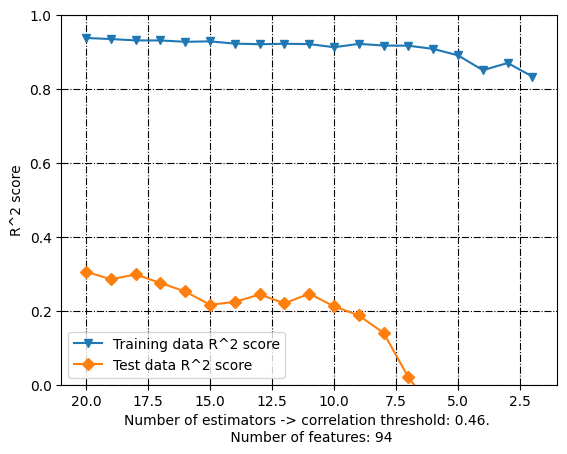

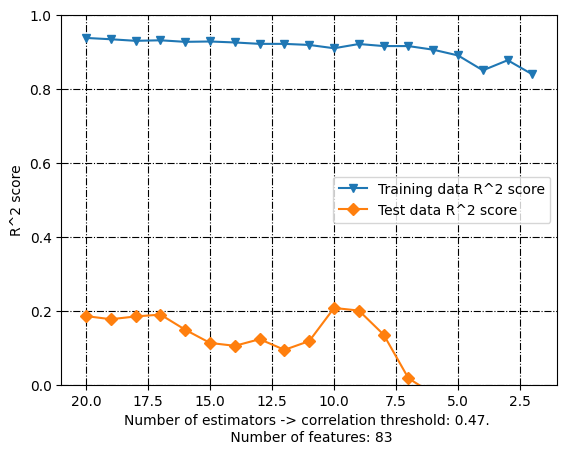

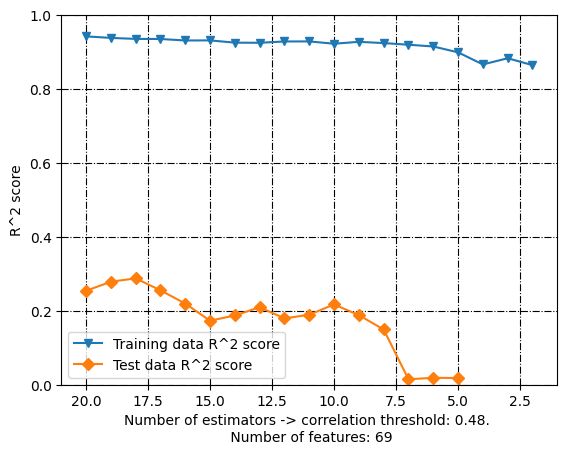

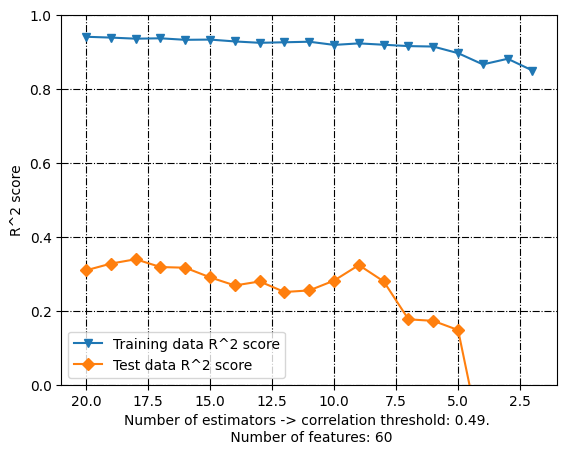

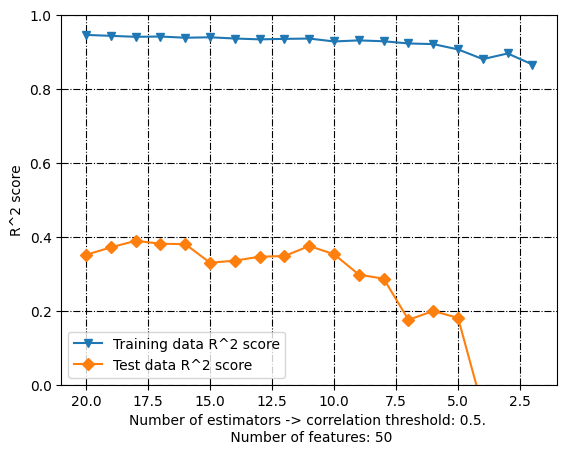

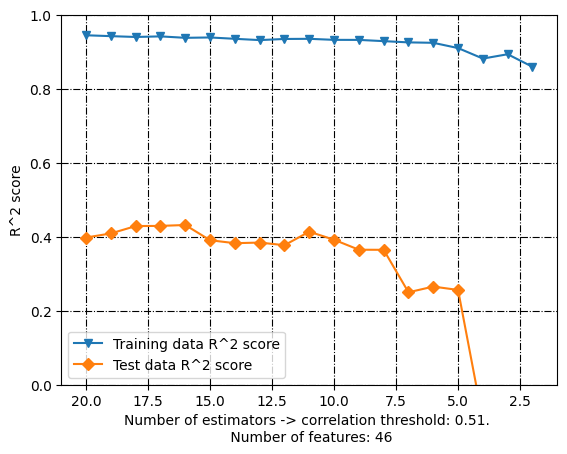

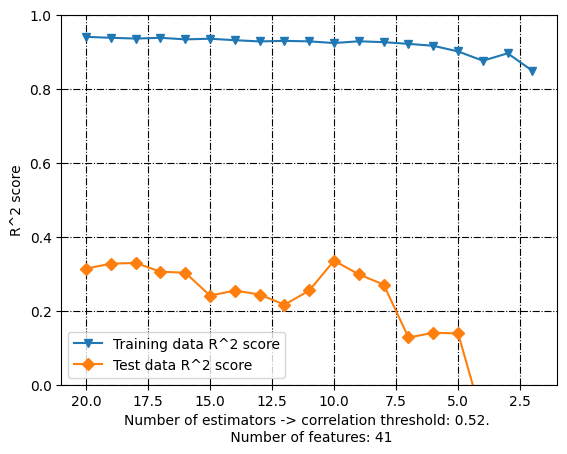

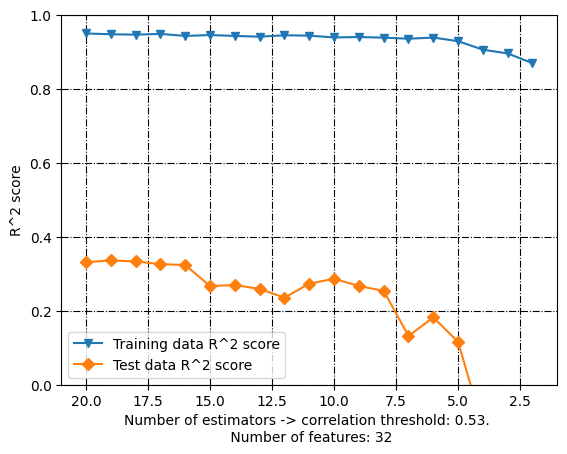

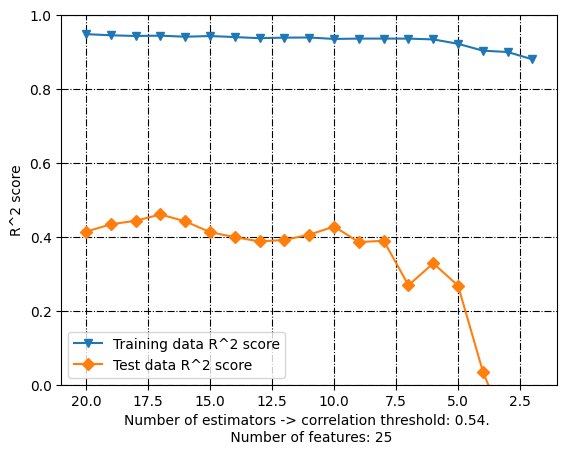

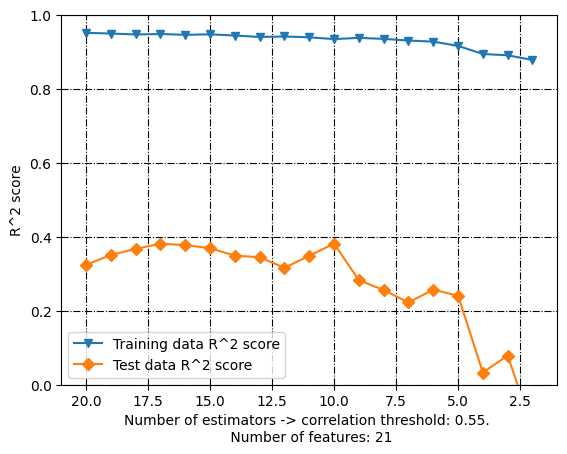

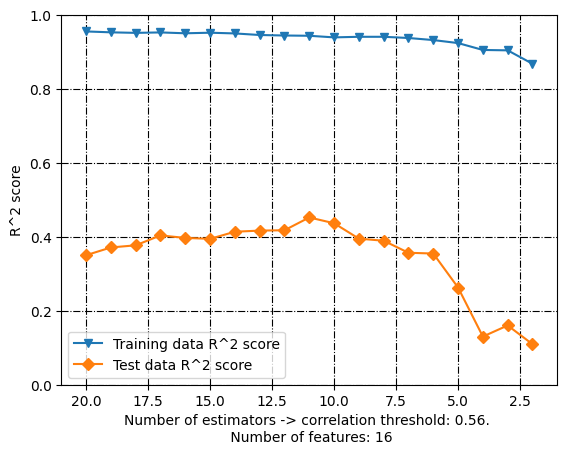

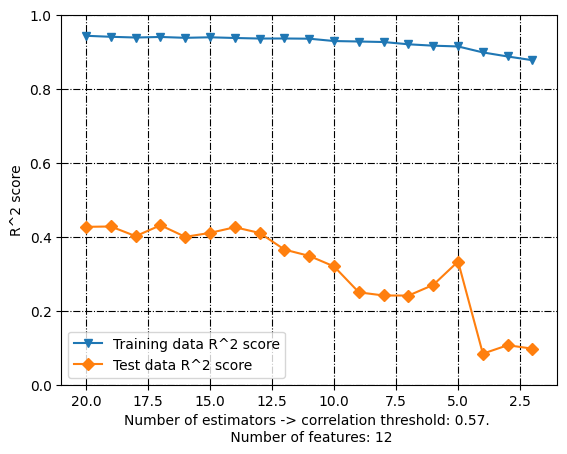

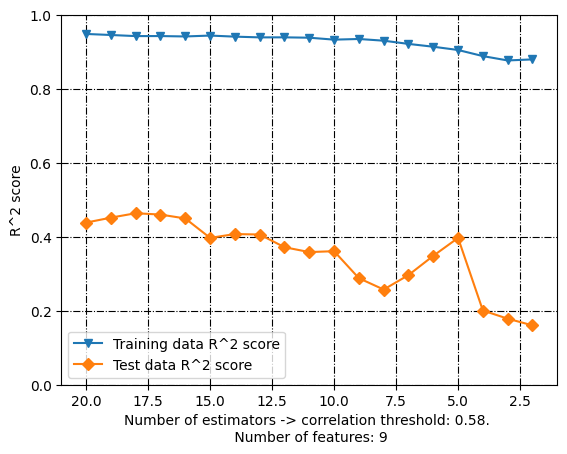

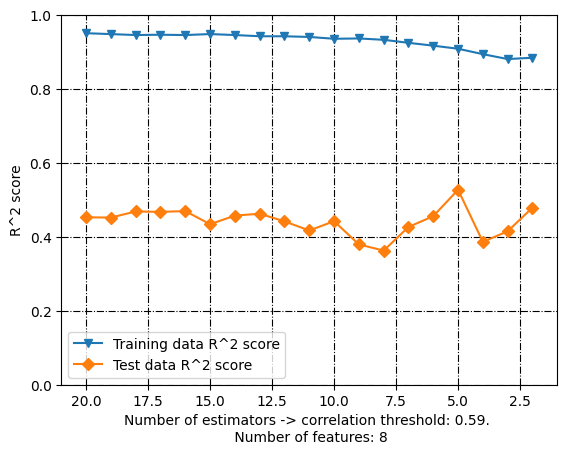

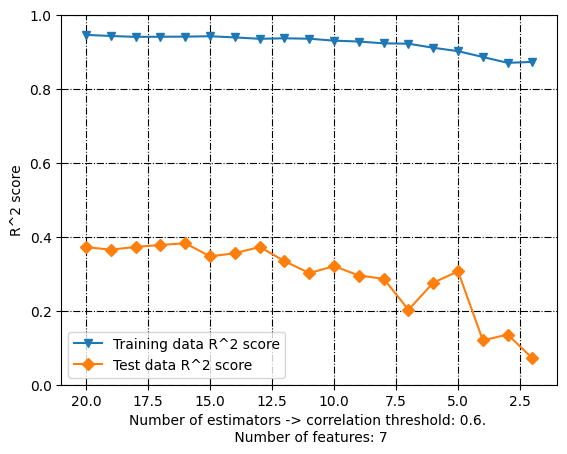

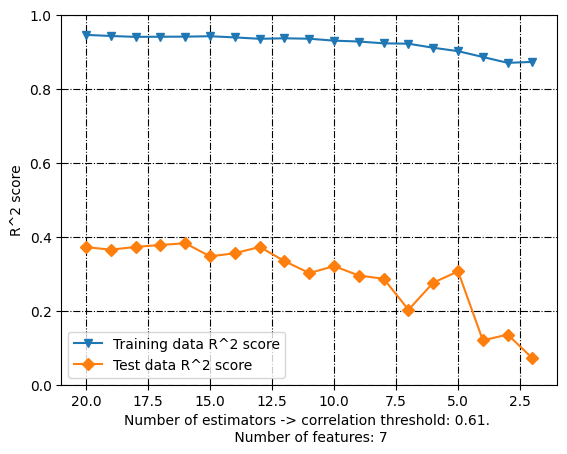

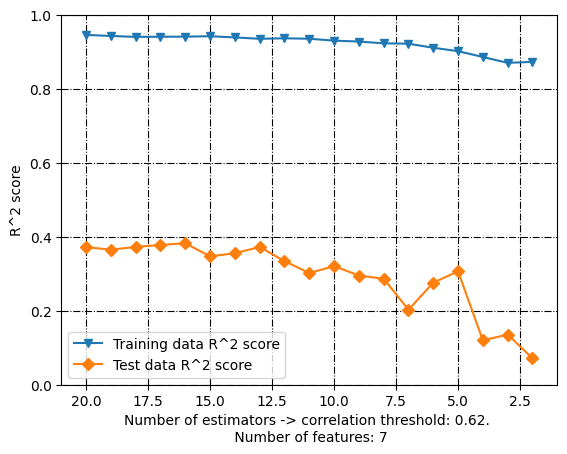

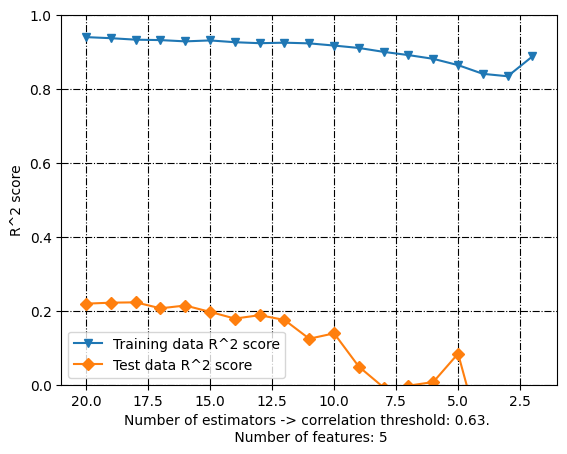

In [28]:
corre_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(0.01*100))]
for element in corre_list:
    element_ = df_without_standardization[df_without_standardization['Correlation threshold'] == float(element)]
    plt.plot(element_['Number of estimators'], element_['Training data R^2 score'], label = "Training data R^2 score", marker='v')
    plt.plot(element_['Number of estimators'], element_['Test data R^2 score'], label = "Test data R^2 score", marker='D')
    plt.legend()
    plt.xlabel('Number of estimators -> correlation threshold: '+str(element)+'. \n Number of features: '+str(element_['Number of features'].iloc[0]))
    plt.xlim(max(element_['Number of estimators'])+1, min(element_['Number of estimators'])-1)
    plt.ylabel('R^2 score')
    plt.ylim([0, 1])
    plt.rc('grid', linestyle="-.", color='black')
    plt.grid(True)
    plt.show()

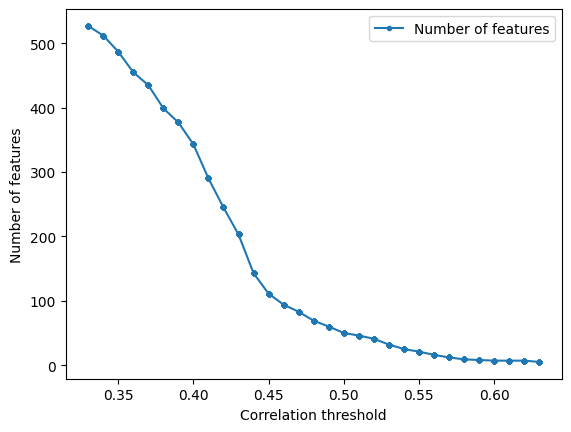

In [29]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

# KNeighborsRegressor

In [30]:
without_standardization, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.50, 
                                                                                                    standardization=False, 
                                                                                                    model_type='KNeighborsRegressor',
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.018677
1                  AATS0are   -0.341313
2                    AATS0d   -0.123443
3                   AATS0dv   -0.265670
4                    AATS0i   -0.428929
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.018677                    0.018677
1                  AATS0are   -0.341313                    0.341313
2                    AATS0d   -0.123443                    0.123443
3                   AATS0dv   -0.265670                    0.265670
4                    AATS0i   -0.428929                    0.428929
    molecular descriptor name  corr_value  absolute correlation value
15                     AATS1i   -0.561620                    0.561620
113       

  File "C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


LoVo/DX_transformed
AxesSubplot(0.125,0.11;0.775x0.77)


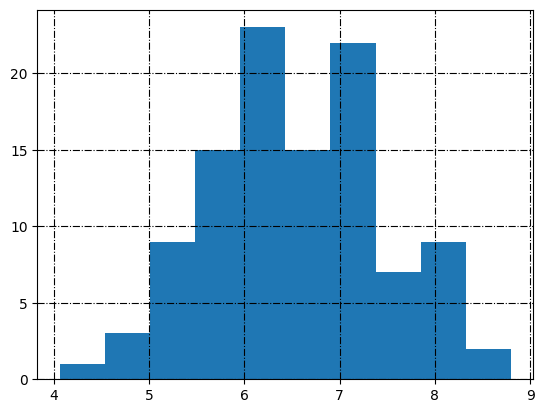

In [31]:
print(target_column_name+str('_transformed'))
print(hist1[target_column_name].hist())

In [32]:
with_standardization, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.50, 
                                                                                                    standardization=True, 
                                                                                                    model_type='KNeighborsRegressor',
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)

I am doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.018677
1                  AATS0are   -0.341313
2                    AATS0d   -0.123443
3                   AATS0dv   -0.265670
4                    AATS0i   -0.428929
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.018677                    0.018677
1                  AATS0are   -0.341313                    0.341313
2                    AATS0d   -0.123443                    0.123443
3                   AATS0dv   -0.265670                    0.265670
4                    AATS0i   -0.428929                    0.428929
    molecular descriptor name  corr_value  absolute correlation value
15                     AATS1i   -0.561620                    0.561620
113           

## Search inside correlation space

In [33]:
step = 0.01
initial_step = corr_low
last_step = corr_high
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
fourth_l = []
fifth_l = []
f_list = []
for i in first_list:
    without_standardization, train_r2, test_r2, _, h_, target_column_name, training_data_RMSE, test_data_RMSE = pred_model.prepare_data_and_create_model(molecular_descriptors_df = data, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standardization = False, 
                                                                                                    model_type = 'KNeighborsRegressor',
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_ = True, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    fourth_l.append(training_data_RMSE)
    fifth_l.append(test_data_RMSE)
    f_list.append(len(h_))


In [34]:
df_without_standardization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_without_standardization['Training data R^2 score'] = second_list
df_without_standardization['Test data R^2 score'] = third_list
df_without_standardization['Training RMSE'] = fourth_l
df_without_standardization['Test RMSE'] = fifth_l
df_without_standardization['Number of features'] = f_list

In [35]:
df_k_nearest = df_without_standardization.copy()
df_without_standardization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Training RMSE,Test RMSE,Number of features
0,0.33,0.427920,-0.354151,0.725114,0.732460,527
1,0.34,0.393236,-0.610533,0.746771,0.798794,512
2,0.35,0.379229,-0.552617,0.755342,0.784300,487
3,0.36,0.374933,-0.728855,0.757951,0.827617,455
4,0.37,0.374933,-0.728855,0.757951,0.827617,435
5,0.38,0.454372,-0.467707,0.708151,0.762553,399
6,0.39,0.462046,-0.417494,0.703154,0.749395,377
7,0.40,0.480161,-0.515220,0.691214,0.774797,343
8,0.41,0.480910,-0.662761,0.690716,0.811643,290
9,0.42,0.466795,-0.542875,0.700044,0.781836,245


## Plots

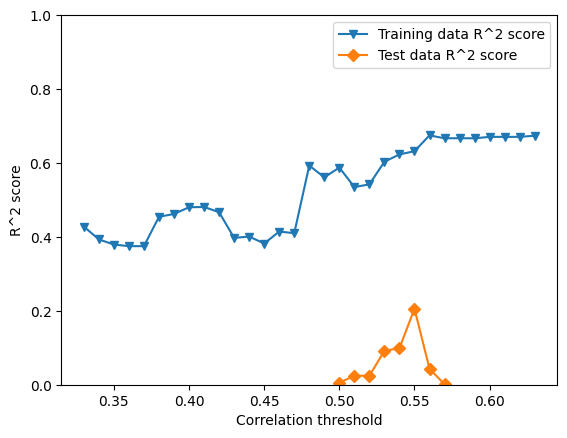

In [36]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Training data R^2 score'], label = "Training data R^2 score", marker='v')
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Test data R^2 score'], label = "Test data R^2 score", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R^2 score')
plt.ylim([0, 1])
plt.show()

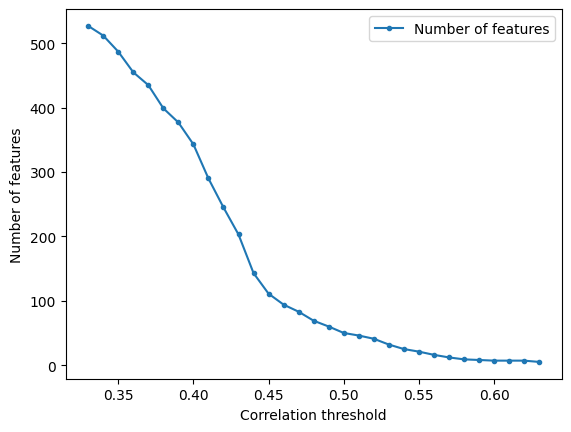

In [37]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

# Support Vector Machines (SVM)

In [38]:
without_standardization, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.50, 
                                                                                                    standardization=False, 
                                                                                                    model_type='SVR',
                                                                                                    kernel_ = 'linear',
                                                                                                    gamma_ = 'auto',
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.018677
1                  AATS0are   -0.341313
2                    AATS0d   -0.123443
3                   AATS0dv   -0.265670
4                    AATS0i   -0.428929
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.018677                    0.018677
1                  AATS0are   -0.341313                    0.341313
2                    AATS0d   -0.123443                    0.123443
3                   AATS0dv   -0.265670                    0.265670
4                    AATS0i   -0.428929                    0.428929
    molecular descriptor name  corr_value  absolute correlation value
15                     AATS1i   -0.561620                    0.561620
113       

LoVo/DX_transformed
AxesSubplot(0.125,0.11;0.775x0.77)


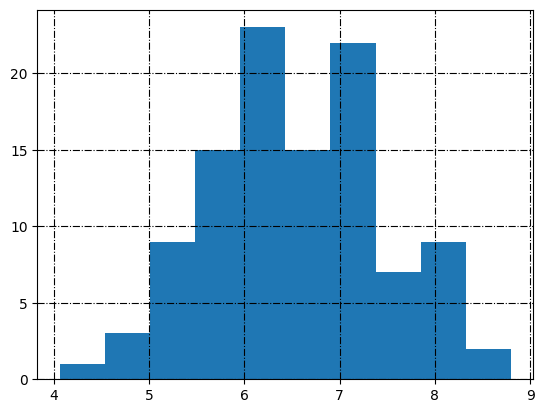

In [39]:
print(target_column_name+str('_transformed'))
print(hist1[target_column_name].hist())

In [40]:
with_standardization, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.50, 
                                                                                                    standardization=True, 
                                                                                                    model_type='SVR',
                                                                                                    kernel_ = 'linear',
                                                                                                    gamma_ = 'auto',
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)

I am doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.018677
1                  AATS0are   -0.341313
2                    AATS0d   -0.123443
3                   AATS0dv   -0.265670
4                    AATS0i   -0.428929
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.018677                    0.018677
1                  AATS0are   -0.341313                    0.341313
2                    AATS0d   -0.123443                    0.123443
3                   AATS0dv   -0.265670                    0.265670
4                    AATS0i   -0.428929                    0.428929
    molecular descriptor name  corr_value  absolute correlation value
15                     AATS1i   -0.561620                    0.561620
113           

## Search inside correlation space

In [41]:
step = 0.01
initial_step = corr_low
last_step = corr_high
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
fourth_l = []
fifth_l = []
f_list = []
for i in first_list:
    without_standardization, train_r2, test_r2, _, h_, target_column_name, training_data_RMSE, test_data_RMSE = pred_model.prepare_data_and_create_model(molecular_descriptors_df = data, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standardization = False, 
                                                                                                    model_type = 'SVR',
                                                                                                    kernel_ = 'linear',
                                                                                                    gamma_ = 'auto',
                                                                                                    target_column_name = target,
                                                                                                    random_state=random_state,
                                                                                                    train_test_split_ = True, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    fourth_l.append(training_data_RMSE)
    fifth_l.append(test_data_RMSE)
    f_list.append(len(h_))

In [42]:
df_without_standardization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_without_standardization['Training data R^2 score'] = second_list
df_without_standardization['Test data R^2 score'] = third_list
df_without_standardization['Training RMSE'] = fourth_l
df_without_standardization['Test RMSE'] = fifth_l
df_without_standardization['Number of features'] = f_list

In [43]:
df_svm = df_without_standardization.copy()
df_without_standardization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Training RMSE,Test RMSE,Number of features
0,0.33,-4.960511e+06,-1.795669e+07,2135.212850,2667.247166,527
1,0.34,-4.592888e+06,-2.802811e+07,2054.569717,3332.322578,512
2,0.35,-2.716580e+06,-1.402362e+07,1580.117033,2357.111448,487
3,0.36,-1.101852e+06,-8.556822e+06,1006.328218,1841.222849,455
4,0.37,-1.976878e+06,-7.256922e+06,1347.932090,1695.611466,435
5,0.38,-7.107772e+05,-6.998006e+06,808.248633,1665.088300,399
6,0.39,-3.252029e+05,-1.124577e+06,546.708466,667.490194,377
7,0.40,-7.844252e+05,-1.621615e+06,849.090439,801.538002,343
8,0.41,-2.861919e+05,-1.117552e+06,512.870078,665.402160,290
9,0.42,-1.170156e+04,-5.464849e+04,103.709452,147.144200,245


## Plots

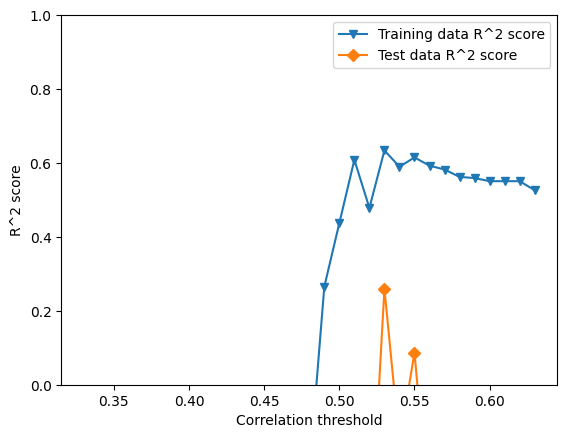

In [44]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Training data R^2 score'], label = "Training data R^2 score", marker='v')
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Test data R^2 score'], label = "Test data R^2 score", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R^2 score')
plt.ylim([0, 1])
plt.show()

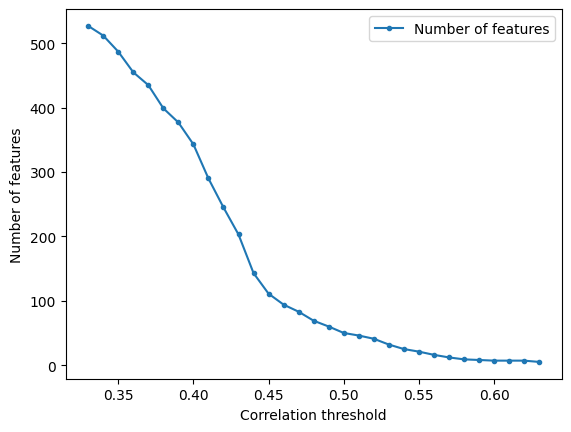

In [45]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

## Store quality measurements

In [46]:
with pd.ExcelWriter('../Data/Quality_'+'LoVo_DX'+'_'+str(random_state)+'_.xlsx') as writer:  
    df_linear.to_excel(writer, sheet_name='MLR')
    df_decision_tree.to_excel(writer, sheet_name='DT')
    df_random_forest.to_excel(writer, sheet_name='RF')
    df_k_nearest.to_excel(writer, sheet_name='KNN')
    df_svm.to_excel(writer, sheet_name='SVM')